# PS0
## Hannah Jones
Nueral Networks and Machine Learning \
Fall 2020 \
CSCI 520, Martin White \
Due: Sept 8


## Contents
1. Make Your Own Neural Network, Tariq Rashid
2. KD Nuggets, Basic Image Data Analysis Using Numpy and OpenCV
3. KD Nuggets, Preprocessing for Deep Learning: From covariance matrix to image whitening

-------
# Make Your Own Neural Network 
## Part 2

Author: Tariq Rashid \
Reproduced by: Hannah Jones

CSCI 688 
Aug 30 2020

In [160]:
### Gentle Introduction into Python

10*44
print("Go Tribe!")

Go Tribe!


In [2]:
x = 5
print(x)
print(x + 2)

y = x + 9
print(y)



5
7
14


In [3]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
for n in range(10):
    print(n)
    print("The cube root of", n, "is", n*n*n)
    pass
print("done")

0
The cube root of 0 is 0
1
The cube root of 1 is 1
2
The cube root of 2 is 8
3
The cube root of 3 is 27
4
The cube root of 4 is 64
5
The cube root of 5 is 125
6
The cube root of 6 is 216
7
The cube root of 7 is 343
8
The cube root of 8 is 512
9
The cube root of 9 is 729
done


In [5]:
# function that takes 2 numbers as an input and outputs their max
def max(x,y):
    print("\nFIND MAX")
    print("First input is", x)
    print("Second input is",y)
    if x>y:
        print(">>x is max")
        a = x
    elif y>x:
        print(">>y is max")
        a = y
    else:
        print(">>x and y are both")
        a = x
    return a

In [6]:
max(1,3)

max(10,10)

max(7,2)


FIND MAX
First input is 1
Second input is 3
>>y is max

FIND MAX
First input is 10
Second input is 10
>>x and y are both

FIND MAX
First input is 7
Second input is 2
>>x is max


7

## Arrays

In [7]:
import numpy as np

In [8]:
a = np.zeros([3,2])
print(a)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [9]:
a[0,0] = 1
a[0,1] = 2
a[1,0] = 3
a[2,1] = 5
print(a)

[[1. 2.]
 [3. 0.]
 [0. 5.]]


In [10]:
print(a[0,1])
v = a[1,0]
print(v)

2.0
3.0


## Plotting Arrarys

In [11]:
import matplotlib.pyplot as mp
%matplotlib inline

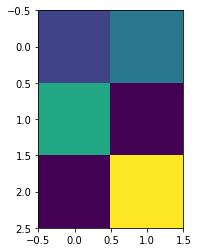

In [12]:
mp.imshow(a, interpolation="nearest")

## Objects

In [13]:
# class for a shoe object
class Shoe:
    
    # Shoes can skrt():
    def skrt(self):
        print("skrt!")
        pass
    pass

In [14]:
saucony = Shoe()
adidas = Shoe()

In [15]:
saucony.skrt()
adidas.skrt()

skrt!
skrt!


In [16]:
# class for a dog object 
class Drink:
    
    #initialization method with internal data
    def __init__(self,drinkname,temp):
        self.name = drinkname;
        self.temperature = temp;
        
    # get status
    def status(self):
        print("drink name is",self.name)
        print("drink temp is",self.temperature)
        pass
    
    # set temperature
    def setTemperature(self,temp):
        self.temperature = temp;
        pass
    
    # Drinks are half full
    def full(self):
        print("I'm half full!")
        pass
    
    pass

In [17]:
matcha = Drink("matcha",160)
matcha.status()
matcha.full()

drink name is matcha
drink temp is 160
I'm half full!


In [18]:
matcha.setTemperature(40)
matcha.status()

drink name is matcha
drink temp is 40


## Showing the Neural Network
Pages 140 - 

In [35]:
import numpy as np
import matplotlib.pyplot as pp
%matplotlib inline

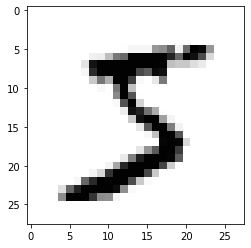

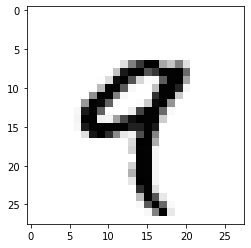

In [39]:
## This code will plot a test handwritten number (5)

all_values = dl[4].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
pp.imshow(image_array, cmap = 'Greys', interpolation = 'None')

## Preparing the MNIST Training Data

In [40]:
# scale input data
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
# [1:] skips the data label 
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [43]:
# Construct target Matrix 

onodes = 10
targets = np.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

In [44]:
print(targets)

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99]


## Neural Network with Python

In [166]:
import numpy as np
import scipy.special as sp
# neural network class definition

class neuralNetwork:
    
    #initialize the neural network
    def __init__(self,inputnodes, hiddennodes, outputnodes, learningrate):
    
        
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, with and who 
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc

        self.wih = np.random.normal(0.0,pow(self.inodes,-0.5),(self.hnodes,self.inodes))
        self.who = np.random.normal(0.0,pow(self.hnodes,-0.5),(self.onodes,self.hnodes))
        
        # learning rate
        self.lr = learningrate
        
        #activiation function is the sigmoid function
        self.activation_function = lambda x: sp.expit(x)
        pass
    
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * 
                                      (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * 
                                      (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass
    
    #query the neural network
    def query(self,inputs_list):
        #convert inputs into 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        #calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih,inputs)
        #calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        #calculate signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

In [219]:
# number of input, hidden, and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate is 0.3
learning_rate = 0.1


# create instance of neural network
nn = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

#load the net work
df = open("mnist_dataset/mnist_train.csv",'r',encoding='utf-8-sig')
dl = df.readlines()
df.close()

In [220]:
# train the neural network 

#epoch is the number of runs the training set is used for data
epochs = 7

for e in range(epochs):
    for record in dl:
        all_values = record.split(',')
    
    #scale and shift
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    #create the target output values
        targets = np.zeros(output_nodes) + 0.01
    
    #all_values[0]
        targets[int(all_values[0])] = 0.99
        nn.train(inputs, targets)
        pass
    pass

## Testing the Network

In [221]:
# load the mnist test data CSV file into a list
test_df = open("mnist_dataset/mnist_test.csv",'r',encoding='utf-8-sig')
test_dl = test_df.readlines()
test_df.close()

In [222]:
# get the first test record
all_values = test_dl[0].split(",")
print(all_values[0])

7


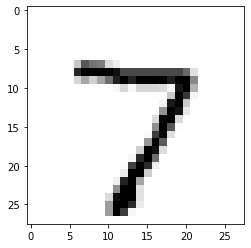

In [223]:
image_array = np.asfarray(all_values[1:]).reshape((28,28))
pp.imshow(image_array, cmap = 'Greys', interpolation = 'None')

In [224]:
nn.query((np.asfarray(all_values[1:])  / (255.0 * 0.99)) + 0.01)

array([[0.00462325],
       [0.005657  ],
       [0.00729029],
       [0.00574577],
       [0.00681656],
       [0.00997301],
       [0.00530961],
       [0.99434728],
       [0.00178224],
       [0.00594756]])

In [225]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_dl:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    #print(correct_label,"correct label")
    # scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = nn.query(inputs)
    # the index of the highest value corresponds to the label
    label = np.argmax(outputs)
    #print(label, "network's answer \n")
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

In [226]:
#print(scorecard)

In [227]:
# calculate the performance score, the fraction of correct answers
scorecard_array = np.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9734


# Part 2 Even More Fun


In [272]:
range(len(g.glob('images/?.png')))

range(0, 6)

In [265]:
# helper to load data from PNG image files
import imageio as io
# glob helps select multiple files using patterns
import glob as g

import numpy as np
# library for plotting arrays
import matplotlib.pyplot as mp
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

# our own image test data set
my_hand = []


for name in g.glob('images/?.png'):
    print ("loading ... ", name)
    # use the filename to set the correct label
    label = int(name[-5:-4])
    # load image data from png files into an array
    img_array = io.imread(name, as_gray=True)
    # reshape from 28x28 to list of 784 values, invert values
    img_data  = 255.0 - img_array.reshape(784)
    # then scale data to range from 0.01 to 1.0
    
    img_data = (img_data / 255.0 * 0.99) + 0.01
    #print(np.min(img_data))
    #print(np.max(img_data))
    # append label and image data  to test data set
    
    record = np.append(label,img_data)
    #print(record)
    my_hand.append(record)
    pass

loading ...  images/4.png
loading ...  images/7.png
loading ...  images/6.png
loading ...  images/3.png
loading ...  images/1.png
loading ...  images/0.png


In [266]:
#print(my_hand[0][1:])

[[2.23356930e-05]
 [2.76843971e-02]
 [5.38862359e-04]
 [1.87148830e-03]
 [6.28006312e-04]
 [1.36482970e-01]
 [1.10554315e-04]
 [1.02710494e-02]
 [5.08979596e-05]
 [3.37227314e-02]]
network says  5
correct label:  4.0
no match :( 

[[7.92043308e-06]
 [1.00061880e-02]
 [9.28978985e-04]
 [5.38688177e-02]
 [6.47732890e-04]
 [4.79550147e-03]
 [5.32230240e-05]
 [1.17133407e-01]
 [9.56738406e-06]
 [1.40657452e-02]]
network says  7
correct label:  7.0
>>>>>MATCH<<<<<< 

[[2.08874221e-04]
 [1.73775887e-02]
 [1.57035408e-02]
 [5.37481397e-04]
 [2.14072072e-03]
 [1.34671620e-01]
 [1.31046620e-02]
 [4.35720497e-03]
 [1.19087244e-04]
 [9.56313649e-04]]
network says  5
correct label:  6.0
no match :( 

[[2.20605254e-05]
 [1.19434904e-03]
 [2.04537860e-04]
 [2.71023233e-03]
 [2.47691816e-04]
 [6.93730231e-02]
 [5.82530209e-05]
 [7.20917569e-02]
 [2.67281874e-06]
 [8.02868971e-03]]
network says  7
correct label:  3.0
no match :( 

[[5.63937551e-05]
 [1.44858400e-01]
 [5.70951495e-02]
 [8.63960863e-03]

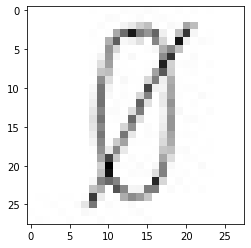

In [278]:
# test the neural network with our own images

# record to test
for item in range(len(g.glob('images/?.png'))):

# plot image
#image_array = np.asfarray(all_values[1:]).reshape((28,28))
#mp.imshow(my_hand, cmap = 'Greys', interpolation = 'None')
    mp.imshow(my_hand[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
    correct_label = my_hand[item][0]
# data is remaining values
    inputs = my_hand[item][1:]

# query the network
    outputs = nn.query(inputs)
    print (outputs)

# the index of the highest value corresponds to the label
    label = np.argmax(outputs)
    print("network says ", label)
    print("correct label: ", correct_label)
# append correct or incorrect to list
    if (label == correct_label):
        print (">>>>>MATCH<<<<<< \n")
    else:
        print ("no match :( \n")
        pass

---------------
# KD Nuggets
## Basic Image Data Analysis Using Numpy and OpenCV (Part 1)

URL: https://www.kdnuggets.com/2018/07/basic-image-data-analysis-numpy-opencv-p1.html

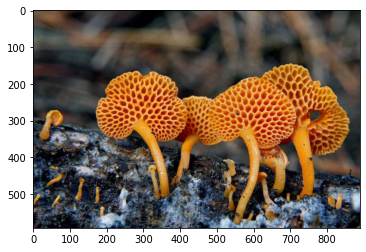

In [10]:
## Load image and observe its various properties in general
import pandas as pd
import imageio as io
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
    
pic = io.imread('fungi.jpg')
plt.figure(figsize(15,15))
    
plt.imshow(pic)

In [17]:
print('Type of the image:', type(pic), "\n\n",
     'Shape of the image: {}'.format(pic.shape), "\n",
     'Image height {}'.format(pic.shape[0]), "\n",
     'Image width {}'.format(pic.shape[1]), "\n",
      'Dimension of Image {}'.format(pic.ndim), "\n")

# Calculate the size of a RGB image=
print('Image size {}'.format(pic.size), "\n",
      'Maximum RGB value in this image {}'.format(pic.max()), "\n",
      'Minimum RGB value in this image {}'.format(pic.min()))

Type of the image: <class 'imageio.core.util.Array'> 

 Shape of the image: (592, 889, 3) 
 Image height 592 
 Image width 889 
 Dimension of Image 3 

Image size 1578864 
 Maximum RGB value in this image 255 
 Minimum RGB value in this image 0


[69 64 61]
Value of only R channel 69


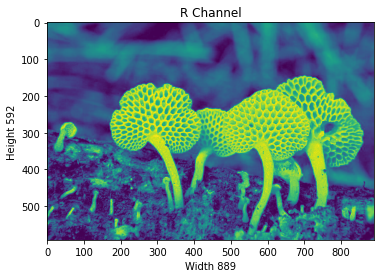

Value of only G channel 64


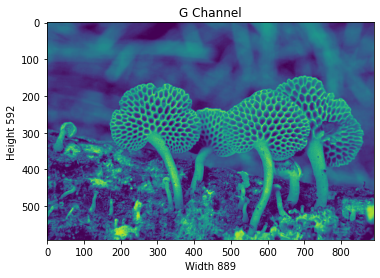

Value of only B channel 61


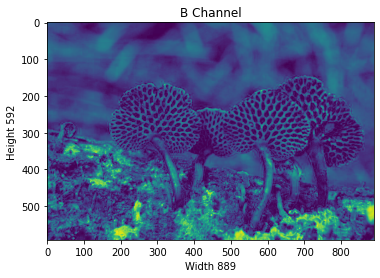

In [32]:
# Let's select a specific pixel (100 x 50)
pic[100,50]

# will return the RGB values
rgb = "RGB"
print(pic[100,50])
for i in range(len(rgb)):
    print("Value of only",rgb[i],"channel {}".format(pic[100,50,i]))
    
    # Look at each individual channel
    
    plt.title(rgb[i] + ' Channel')

    plt.ylabel('Height {}'.format(pic.shape[0]))

    plt.xlabel('Width {}'.format(pic.shape[1]))

    plt.imshow(pic[ : , : , i])

    plt.show()

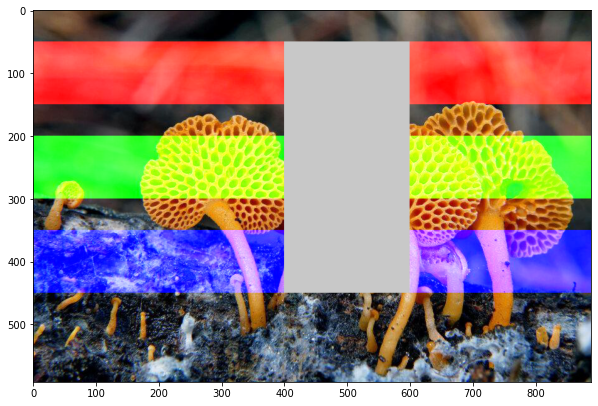

In [37]:
pic = io.imread("fungi.jpg")

pic[50:150 , : , 0] =255  # full intensity to those pixel's R channel
pic[200:300 , : , 1] =255 # full intensity to those pixel's G channel
pic[350:450 , : , 2] =255 # full intensity to those pixel's B channel

## Set value 200 of all channels to those pixels which turns them to white
pic[50:450 , 400:600 , [0,1,2] ] =200

plt.figure( figsize= (10,10))

plt.imshow(pic)

plt.show()

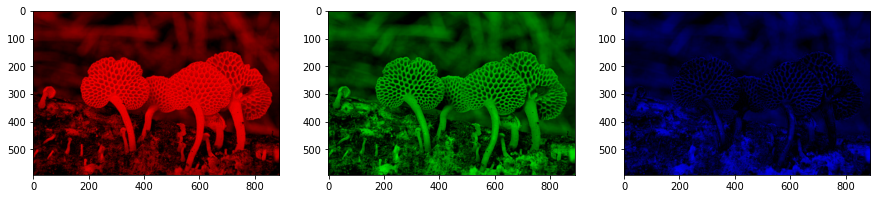

In [41]:
# split the image into seperate color components

import numpy as np

pic=io.imread('fungi.jpg') 

# shows all three photos next to each other
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5)) 

for c,ax in zip(range(3),ax):
    
    # create zero matrix
    
    split_img = np.zeros(pic.shape,dtype="uint8")
    
    #assign each channel 
    split_img[:,:,c] = pic[:,:,c]
    
    #display channe 
    ax.imshow(split_img)

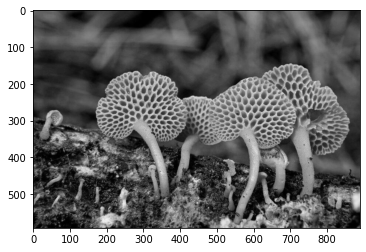

In [54]:
# Convert the image to Greyscale=
### y = 0.299*R + 0.587*G + 0.114*B ###
pic=io.imread('fungi.jpg') 

# function to multiple array numbers to scale it
gray = lambda x: np.dot(pic[...,:3],[0.299,0.587,0.114])

gray = gray(pic)
#plt.figure(figsize=(10,10))
plt.imshow(gray,cmap=plt.get_cmap(name='gray'))
plt.show()

[127.5, 127.5, 127.5]


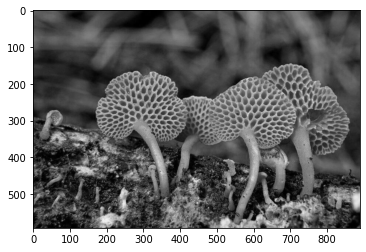

In [77]:
# Lightness (according to GIMP)
pic=io.imread('fungi.jpg') 

#determine Lightness
l = []
for i in range(len(rgb)):
    s = .5*(pic[:,:,0].max() + pic[:,:,0].min())
    l.append(s)
print(l)

# function to multiple array numbers to scale it
light = lambda x: np.dot(pic[...,:3],l)

light = light(pic)
#plt.figure(figsize=(10,10))
plt.imshow(gray,cmap=plt.get_cmap(name='gray'))
plt.show()

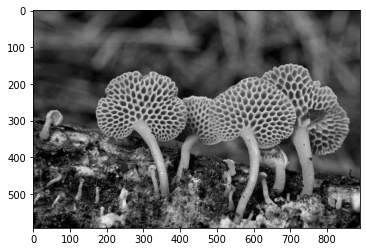

In [78]:
# Luminosity (according to GIMP)
pic=io.imread('fungi.jpg') 

# function to multiple array numbers to scale it
lumin = lambda x: np.dot(pic[...,:3],[.21,0.72,0.07])

lumin = lumin(pic)
#plt.figure(figsize=(10,10))
plt.imshow(lumin,cmap=plt.get_cmap(name='gray'))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


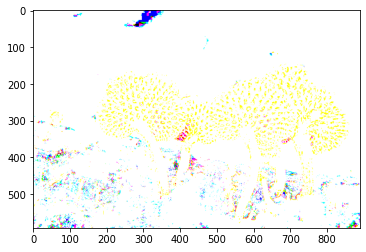

In [79]:
# Average Brightness
pic=io.imread('fungi.jpg') 
t = []
for i in range(len(rgb)):
    t.append(pic[:,:,i])
    
t = np.mean(t)

bright = lambda x: np.dot(pic[...,:3],t)

bright = bright(pic)
#plt.figure(figsize=(10,10))
plt.imshow(bright,cmap=plt.get_cmap(name='gray'))
plt.show()

In [159]:
# Check properties of grayscale image
print('Type of the image : ',type(gray), "\n\n",
      'Shape of the image : {}'.format(gray.shape), "\n",
      'Image Hight {}'.format(gray.shape[0]), "\n",
      'Image Width {}'.format(gray.shape[1]), "\n",
      'Dimension of Image {}'.format(gray.ndim),"\n\n",
      'Image size {}'.format(gray.size), "\n",
      'Maximum RGB value in this image {}'.format(gray.max()), "\n",
      'Minimum RGB value in this image {}'.format(gray.min()), "\n",
      'Random indexes [X,Y] : {}'.format(gray[100,50]))

Type of the image :  <class 'imageio.core.util.Array'> 

 Shape of the image : (592, 889) 
 Image Hight 592 
 Image Width 889 
 Dimension of Image 2 

 Image size 526288 
 Maximum RGB value in this image 94095.0 
 Minimum RGB value in this image 0.0 
 Random indexes [X,Y] : 24735.0


----------
# KD Nuggets
## Preprocessing for Deep Learning: From Covariance  Matrix to Image Whitening

URL: https://www.kdnuggets.com/2018/10/preprocessing-deep-learning-covariance-matrix-image-whitening.html

### Page 1

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

A = np.array([[1,2,3],
              [9,8,7],
              [5,4,6]])
A

array([[-4.        , -2.66666667, -2.33333333],
       [ 4.        ,  3.33333333,  1.66666667],
       [ 0.        , -0.66666667,  0.66666667]])

In [93]:
np.cov(A, rowvar=False, bias=True)

array([[10.66666667,  8.        ,  5.33333333],
       [ 8.        ,  6.22222222,  3.77777778],
       [ 5.33333333,  3.77777778,  2.88888889]])

In [91]:
def CalcCov(X):
    meanX = np.mean(X, axis = 0)
    lenX = X.shape[0]
    X = X - meanX
    Cov = X.T.dot(X)/lenX
    return Cov

In [92]:
CalcCov(A)

array([[10.66666667,  8.        ,  5.33333333],
       [ 8.        ,  6.22222222,  3.77777778],
       [ 5.33333333,  3.77777778,  2.88888889]])

In [95]:
def plotDataAndCov(data):
    ACov = np.cov(data, rowvar=False, bias=True)
    print('Covariance matrix:\n', ACov)
 
    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(10, 10)

    ax0 = plt.subplot(2, 2, 1)
    
    # Choosing the colors
    cmap = sns.color_palette("GnBu", 10)
    sns.heatmap(ACov, cmap=cmap, vmin=0)

    ax1 = plt.subplot(2, 2, 2)
    
    # data can include the colors
    if data.shape[1]==3:
        c=data[:,2]
    else:
        c="#0A98BE"
    ax1.scatter(data[:,0], data[:,1], c=c, s=40)
    
    # Remove the top and right axes from the data plot
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

## Simulating Data

In [96]:
np.random.seed(1234)
a1 = np.random.normal(2, 1, 300)
a2 = np.random.normal(1, 1, 300)
A = np.array([a1, a2]).T
A.shape # need to transpose in order to do dot product

(300, 2)

In [97]:
A[:10,:]

array([[ 2.47143516,  1.52704645],
       [ 0.80902431,  1.7111124 ],
       [ 3.43270697,  0.78245452],
       [ 1.6873481 ,  3.63779121],
       [ 1.27941127, -0.74213763],
       [ 2.88716294,  0.90556519],
       [ 2.85958841,  2.43118375],
       [ 1.3634765 ,  1.59275845],
       [ 2.01569637,  1.1702969 ],
       [-0.24268495, -0.75170595]])

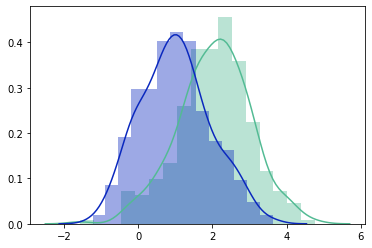

In [101]:
sns.distplot(A[:,0], color="#53BB94") #seaborn allows for heatmaps
sns.distplot(A[:,1], color="#0A28BE")

plt.show()
plt.close()

Covariance matrix:
 [[ 0.95171641 -0.0447816 ]
 [-0.0447816   0.87959853]]


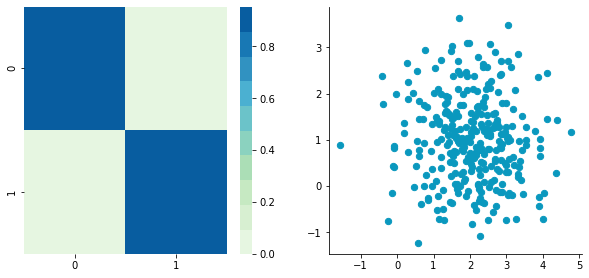

In [102]:
plotDataAndCov(A)
plt.show()
plt.close()

## Correlated data

Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


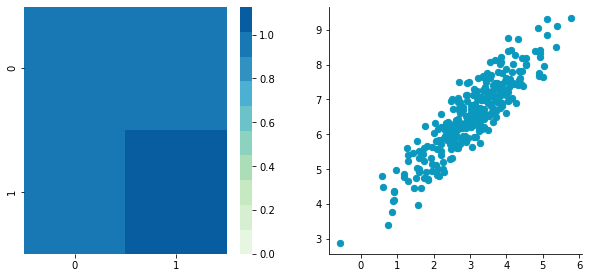

In [104]:
# construct dependent data

np.random.seed(1234)
b1 =  np.random.normal(3, 1, 300)
b2 = b1 + np.random.normal(7, 1, 300)/2.
B = np.array([b1, b2]).T
plotDataAndCov(B)
plt.show()
plt.close()

### Page 2

#### Preprocessing

In [105]:
def center(X):
    newX = X - np.mean(X, axis = 0)
    return newX

Before:


Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


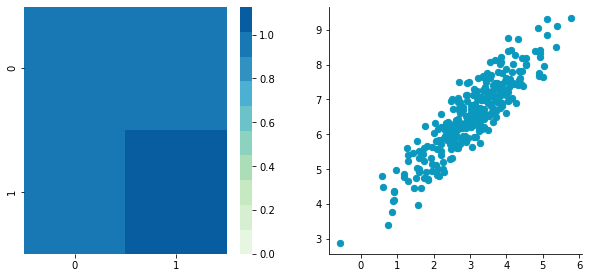

After:


Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


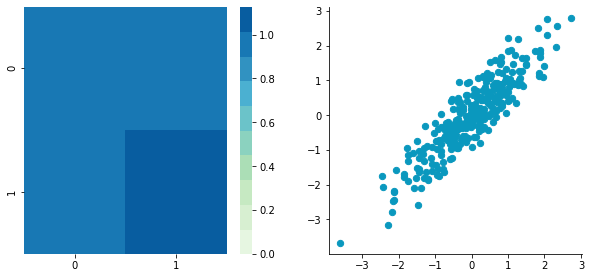

In [107]:
BCentered = center(B)

print('Before:\n\n')

plotDataAndCov(B)
plt.show()
plt.close()

print('After:\n\n')

plotDataAndCov(BCentered)
plt.show()
plt.close()

#### Standardization or normalization

In [111]:
# put all features on the same scale

def stand(X):
    newX = center(X)/np.std(X, axis = 0)
    return newX

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


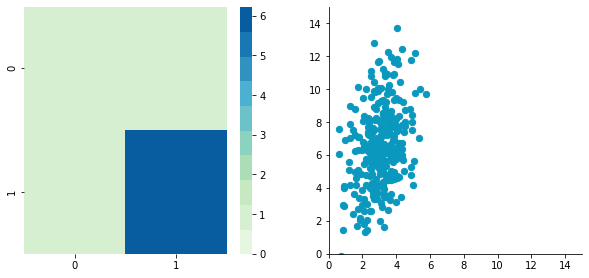

In [112]:
# new dataet with different scale
np.random.seed(1234)
c1 =  np.random.normal(3, 1, 300)
c2 = c1 + np.random.normal(7, 5, 300)/2.
C = np.array([c1, c2]).T

plotDataAndCov(C)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()
plt.close()

Covariance matrix:
 [[1.         0.34500274]
 [0.34500274 1.        ]]


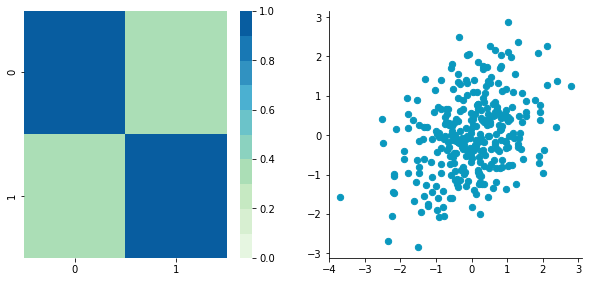

In [113]:
CStandardized = stand(C)

plotDataAndCov(CStandardized)
plt.show()
plt.close()

#### Zero Centering

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


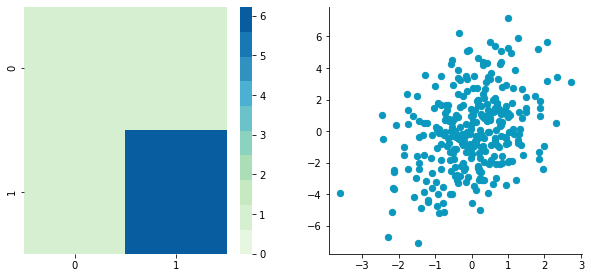

In [114]:
CCentered = center(C)

plotDataAndCov(CCentered)
plt.show()
plt.close()

#### Decorrelate the Data

In [118]:
def dec(X):
    newX = center(X) 
    cov = X.T.dot(X)/float(X.shape[0]) # find covariance
    
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    return decorrelated

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


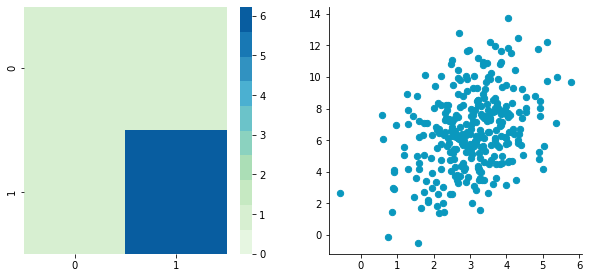

Covariance matrix:
 [[8.21222171e-01 8.88178420e-17]
 [8.88178420e-17 6.35579346e+00]]


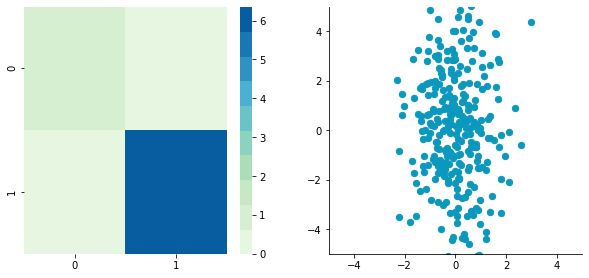

In [119]:
plotDataAndCov(C)
plt.show()
plt.close()

CDecorrelated = dec(CCentered)
plotDataAndCov(CDecorrelated)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
plt.close()

#### Rescale the Data

In [120]:
def whiten(X):
    newX = center(X)
    cov = X.T.dot(X)/float(X.shape[0])
    
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    
    # Rescale the decorrelated data
    white = decorrelated / np.sqrt(eigVals + 1e-5)
    
    return white

Covariance matrix:
 [[9.99987823e-01 1.62832710e-17]
 [1.62832710e-17 9.99998427e-01]]


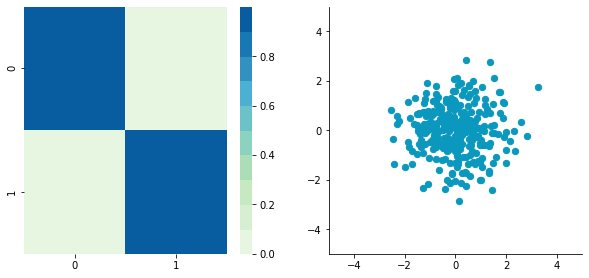

In [121]:
CWhitened = whiten(CCentered)

plotDataAndCov(CWhitened)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
plt.close()

### Page 3 
#### Image Whitening

In [135]:
##################################################################
###### HELP TO DOWNLOAD CIFAR DATA SET FROM                  #####
###### https://github.com/tensorflow/tensorflow/issues/33285 #####
##################################################################

import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [136]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10


(X_train, y_train), (x_test, y_test) = cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [139]:
# Select subset of images

X = X_train[:1000]
print(X.shape)

(1000, 32, 32, 3)


In [140]:
# REshape array to have flat image data with one image per ros

X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
print(X.shape)

(1000, 3072)


In [141]:
# Show images
def plotImage(X):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(X.reshape(32,32,3))
    plt.show()
    plt.close()

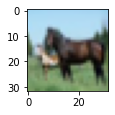

In [142]:
#cute horse
plotImage(X[12, :])

In [144]:
# Now we can whiten the images, however we must rescle them

X_norm = X / 255.
print('X.min()', X_norm.min())
print('X.max()', X_norm.max())

X.min() 0.0
X.max() 1.0


In [145]:
# mean per-pixel (e.g. Wan et al., 2013)
X_norm.mean(axis=0).shape

(3072,)

In [146]:
# values from each pixel
X_norm.mean(axis=0)

array([0.5234    , 0.54323137, 0.5274    , ..., 0.50369804, 0.50011765,
       0.45227451])

In [147]:
#remove the mean from each pixel
X_norm = X_norm - X_norm.mean(axis=0)

In [148]:
# compute mean of first pixel
X_norm.mean(axis=0)

array([-5.30575583e-16, -5.98021632e-16, -4.23439062e-16, ...,
       -1.81965554e-16, -2.49800181e-16,  3.98570066e-17])

In [152]:
# Calculate the cov matrices of the zero-centered data x
# goal is to force algorithm to focus on higher-order relations

cov = np.cov(X_norm, rowvar=False)
cov.shape

# Calculate singular values and vectors to rotate the dataset
U,S,V = np.linalg.svd(cov)
print(U.shape,S.shape)

(3072, 3072) (3072,)


In [153]:
print(np.diag(S))
print('\nshape:', np.diag(S).shape)

[[5.46967832e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.02861434e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.24476904e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.20778268e-15
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.27816743e-15 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.82704012e-15]]

shape: (3072, 3072)


In [158]:
epsilon = 0.3
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm.T).T
# rescale the images

X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
print('min:', X_ZCA_rescaled.min())
print('max:', X_ZCA_rescaled.max())


min: 0.0
max: 1.0


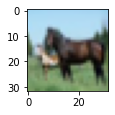

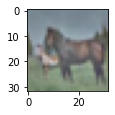

In [157]:
#check our whitening worked

plotImage(X[12, :])
plotImage(X_ZCA_rescaled[12, :])

End